#Predicting the target score after 1st inning in the semi-finals

In the following colab file, we are going to use data of previous ODI matches between the teams and try to predict the target score depending upon which team bats first on the semi finals.

semi-final 1 : India vs New Zealand
semi-final 2 : South Africa vs Australia

We wil be using neural network, random forest and xgb booster models for the training and then we will observe that random forest is the appropriate choice of prediction. So we will use that to predict targeted scores of the upcoming games.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Reading the csv file into df dataframe.

In [657]:
df = pd.read_csv('/content/drive/MyDrive/crickmetric/final.csv')

In [ ]:
df

,Team,Score,Overs,RPO,Inns,Result,Opposition,Ground,Start DateDescending
0,India,410,50.0,8.20,1,won,Netherlands,Bengaluru,12-Nov-23
1,England,337,50.0,6.74,1,won,Pakistan,Eden Gardens,11-Nov-23
2,Bangladesh,306,50.0,6.12,1,lost,Australia,Pune,11-Nov-23
3,Afghanistan,244,50.0,4.88,1,lost,South Africa,Ahmedabad,10-Nov-23
4,Sri Lanka,171,46.4,3.66,1,lost,New Zealand,Bengaluru,09-Nov-23
...,...,...,...,...,...,...,...,...,...
1260,West Indies,263,50.0,5.26,1,lost,India,Kanpur,27-Nov-13
1261,Pakistan,218,50.0,4.36,1,won,South Africa,Cape Town,24-Nov-13
1262,India,288,50.0,5.76,1,lost,West Indies,Visakhapatnam,24-Nov-13
1263,West Indies,211,48.5,4.32,1,lost,India,Kochi,21-Nov-13


In [ ]:
index_of_wankhede = df.index[df['Ground'] == 'Wankhede'].tolist()

print("Index/Indices where 'Ground' is 'Wankhede':", index_of_wankhede)

Index/Indices where 'Ground' is 'Wankhede': [6, 12, 22, 25, 164, 471, 773, 1000]


In [ ]:
df2 = df

Checking if any null values are present in the dataframe

In [ ]:
df.isnull().sum()

Team                    0
Score                   0
Overs                   0
RPO                     0
Inns                    0
Result                  0
Opposition              0
Ground                  0
Start DateDescending    0
dtype: int64

In [ ]:
df

,Team,Score,Overs,RPO,Inns,Result,Opposition,Ground,Start DateDescending
0,India,410,50.0,8.20,1,won,Netherlands,Bengaluru,12-Nov-23
1,England,337,50.0,6.74,1,won,Pakistan,Eden Gardens,11-Nov-23
2,Bangladesh,306,50.0,6.12,1,lost,Australia,Pune,11-Nov-23
3,Afghanistan,244,50.0,4.88,1,lost,South Africa,Ahmedabad,10-Nov-23
4,Sri Lanka,171,46.4,3.66,1,lost,New Zealand,Bengaluru,09-Nov-23
...,...,...,...,...,...,...,...,...,...
1260,West Indies,263,50.0,5.26,1,lost,India,Kanpur,27-Nov-13
1261,Pakistan,218,50.0,4.36,1,won,South Africa,Cape Town,24-Nov-13
1262,India,288,50.0,5.76,1,lost,West Indies,Visakhapatnam,24-Nov-13
1263,West Indies,211,48.5,4.32,1,lost,India,Kochi,21-Nov-13


In [ ]:
df = df.drop(['Overs',	'RPO',	'Inns',	'Result'],axis=1)

In [ ]:
df = df.loc[::-1, :]
df = df.reset_index()
df = df.drop(['index'],axis=1)

In [ ]:
df

,Team,Score,Opposition,Ground,Start DateDescending
0,Sri Lanka,211,New Zealand,Dambulla,16-Nov-13
1,West Indies,211,India,Kochi,21-Nov-13
2,India,288,West Indies,Visakhapatnam,24-Nov-13
3,Pakistan,218,South Africa,Cape Town,24-Nov-13
4,West Indies,263,India,Kanpur,27-Nov-13
...,...,...,...,...,...
1260,Sri Lanka,171,New Zealand,Bengaluru,09-Nov-23
1261,Afghanistan,244,South Africa,Ahmedabad,10-Nov-23
1262,Bangladesh,306,Australia,Pune,11-Nov-23
1263,England,337,Pakistan,Eden Gardens,11-Nov-23


In [660]:
import matplotlib.pyplot as plt
import pandas as pd

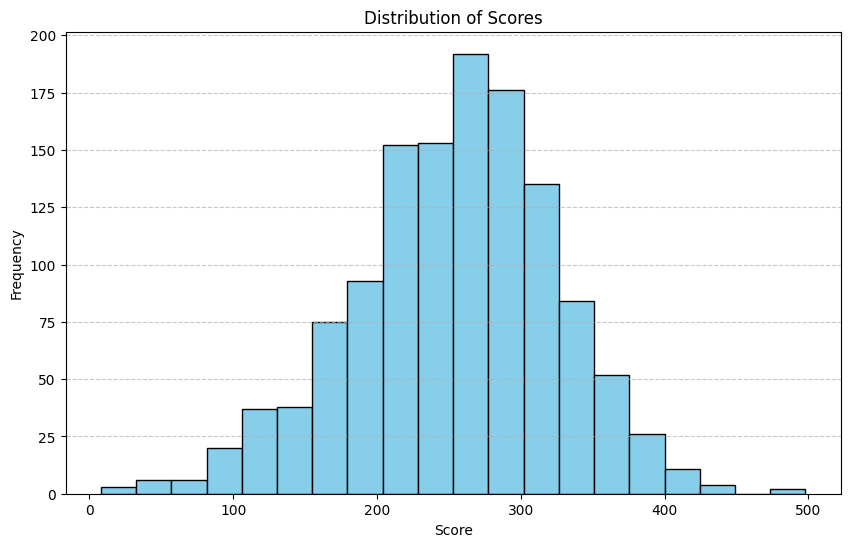

In [661]:
score_data = df['Score']

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(score_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

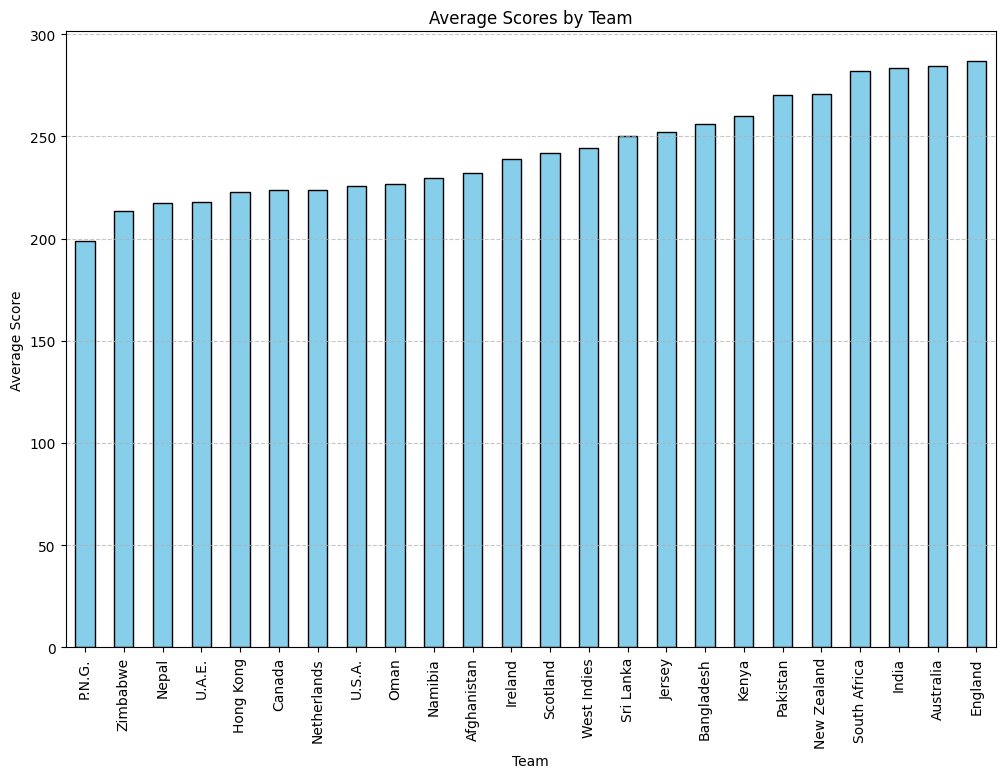

In [663]:
team_scores = df.groupby('Team')['Score'].mean().sort_values()

# Plotting bar chart
plt.figure(figsize=(12, 8))
team_scores.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Scores by Team')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

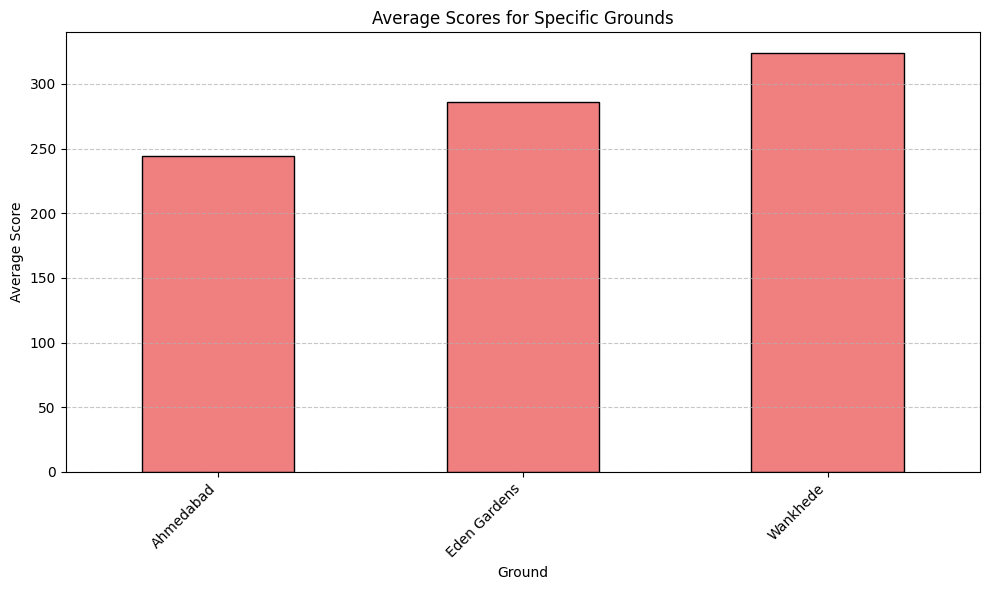

In [665]:
specific_grounds = ['Wankhede', 'Eden Gardens', 'Ahmedabad']

# Filter the dataset for the specific grounds
filtered_df = df[df['Ground'].isin(specific_grounds)]

# Calculate mean scores for each specific ground
ground_scores = filtered_df.groupby('Ground')['Score'].mean().sort_values()

# Plotting bar chart
plt.figure(figsize=(10, 6))
ground_scores.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Scores for Specific Grounds')
plt.xlabel('Ground')
plt.ylabel('Average Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


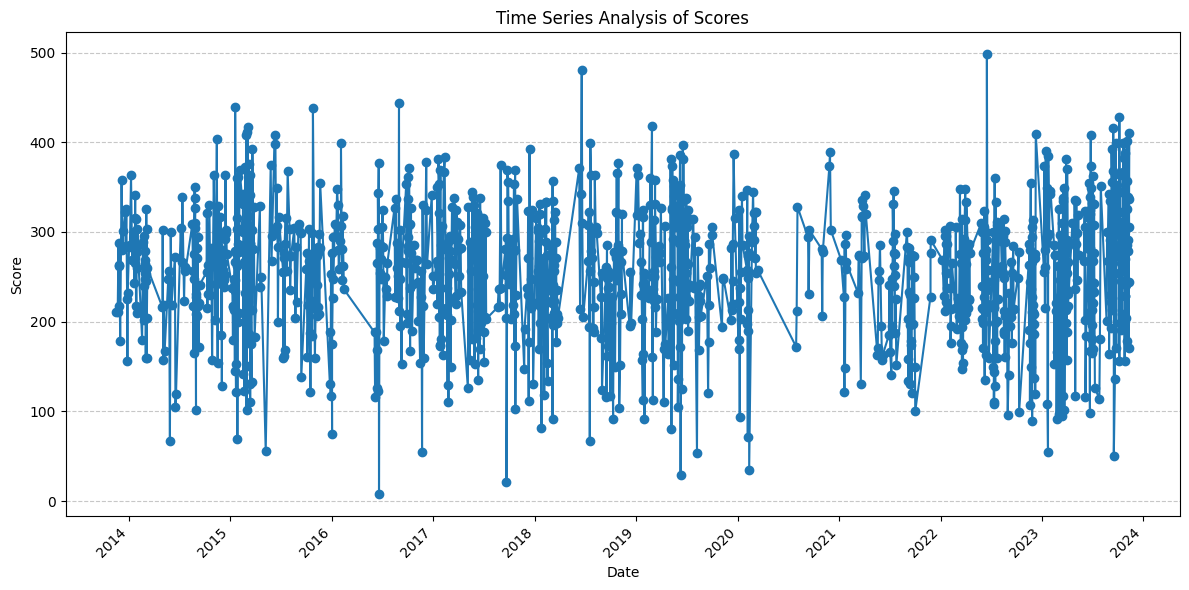

In [671]:
df['date'] = pd.to_datetime(df['Start DateDescending'])
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Score'], marker='o', linestyle='-')
plt.title('Time Series Analysis of Scores')
plt.xlabel('Date')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

We have the data in the descending order of date, so reversing them.

In [669]:
df['date'] = pd.to_datetime(df['Start DateDescending'])

In [ ]:
df = df.drop(['Start DateDescending'],axis=1)

In [ ]:
df

,Team,Score,Opposition,Ground,date
0,Sri Lanka,211,New Zealand,Dambulla,2013-11-16
1,West Indies,211,India,Kochi,2013-11-21
2,India,288,West Indies,Visakhapatnam,2013-11-24
3,Pakistan,218,South Africa,Cape Town,2013-11-24
4,West Indies,263,India,Kanpur,2013-11-27
...,...,...,...,...,...
1260,Sri Lanka,171,New Zealand,Bengaluru,2023-11-09
1261,Afghanistan,244,South Africa,Ahmedabad,2023-11-10
1262,Bangladesh,306,Australia,Pune,2023-11-11
1263,England,337,Pakistan,Eden Gardens,2023-11-11


Converting date to float to use in prediction models

In [ ]:
def dt64_to_float(dt128):
  year = dt128.astype('M8[Y]')
  days = (dt128 - year).astype('timedelta64[D]')
  year_next = year + np.timedelta64(1, 'Y')
  days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')).astype('timedelta64[D]')
  dt_float = 1970 + year.astype(float) + days / (days_of_year)
  return dt_float

In [ ]:
df['date'] = dt64_to_float(df['date'].to_numpy())

In [ ]:
df

,Team,Score,Opposition,Ground,date
0,Sri Lanka,211,New Zealand,Dambulla,2013.873973
1,West Indies,211,India,Kochi,2013.887671
2,India,288,West Indies,Visakhapatnam,2013.895890
3,Pakistan,218,South Africa,Cape Town,2013.895890
4,West Indies,263,India,Kanpur,2013.904110
...,...,...,...,...,...
1260,Sri Lanka,171,New Zealand,Bengaluru,2023.854795
1261,Afghanistan,244,South Africa,Ahmedabad,2023.857534
1262,Bangladesh,306,Australia,Pune,2023.860274
1263,England,337,Pakistan,Eden Gardens,2023.860274


In [ ]:
df

,Team,Score,Opposition,Ground,date
0,Sri Lanka,211,New Zealand,Dambulla,2013.873973
1,West Indies,211,India,Kochi,2013.887671
2,India,288,West Indies,Visakhapatnam,2013.895890
3,Pakistan,218,South Africa,Cape Town,2013.895890
4,West Indies,263,India,Kanpur,2013.904110
...,...,...,...,...,...
1260,Sri Lanka,171,New Zealand,Bengaluru,2023.854795
1261,Afghanistan,244,South Africa,Ahmedabad,2023.857534
1262,Bangladesh,306,Australia,Pune,2023.860274
1263,England,337,Pakistan,Eden Gardens,2023.860274


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.rename(columns={'Team': 'Team1'}, inplace=True)

In [ ]:
df.rename(columns={'Opposition': 'Team2'}, inplace=True)


Creating a directory to map team names to categorical numbers

In [ ]:
# Dictionary containing country mappings
country_mapping = {
    'Afghanistan':0,
    'Australia':1,
    'Bangladesh':2,
    'Canada':3,
    'England':4,
    'Hong Kong':5,
    'India':6,
    'Ireland':7,
    'Kenya':8,
    'Netherlands':9,
    'New Zealand':10,
    'P.N.G':11,
    'Pakistan':12,
    'Scotland':13,
    'South Africa':14,
    'Sri Lanka':15,
    'U.A.E.':16,
    'West Indies':17,
    'Zimbabwe':18,
    'Nepal':19,
    'Oman':20,
    'U.S.A.':21,
    'P.N.G.':22,
    'Jersey':23,
    'Namibia':24
}

In [ ]:
df_temp = df[['Team1', 'Team2']]

In [ ]:
df_temp

,Team1,Team2
0,Sri Lanka,New Zealand
1,West Indies,India
2,India,West Indies
3,Pakistan,South Africa
4,West Indies,India
...,...,...
1260,Sri Lanka,New Zealand
1261,Afghanistan,South Africa
1262,Bangladesh,Australia
1263,England,Pakistan


Using the mapping to transform Team1 and Team2

In [ ]:
df_temp_mapped = df_temp.apply(lambda col: col.map(country_mapping))
df_temp_mapped

,Team1,Team2
0,15,10
1,17,6
2,6,17
3,12,14
4,17,6
...,...,...
1260,15,10
1261,0,14
1262,2,1
1263,4,12


In [ ]:
null_values_count = df_temp_mapped.isnull().sum()

# Display the count of null values for each column
print(null_values_count)

Team1    0
Team2    0
dtype: int64


In [ ]:
indexes_with_null = df_temp_mapped[df_temp_mapped.isnull().any(axis=1)].index

# Display the indexes with null values
print(indexes_with_null)

Int64Index([], dtype='int64')


In [ ]:
print(df_temp_mapped.iloc[138])

Team1    0
Team2    7
Name: 138, dtype: int64


In [ ]:
print(df_temp.iloc[138])

Team1    Afghanistan
Team2        Ireland
Name: 138, dtype: object


Taking the null values into the original df dataframe.

In [ ]:
df[['Team1']] = df_temp_mapped[['Team1']]

In [ ]:
df[['Team2']] = df_temp_mapped[['Team2']]

In [ ]:
df

,Team1,Score,Team2,Ground,date
0,15,211,10,Dambulla,2013.873973
1,17,211,6,Kochi,2013.887671
2,6,288,17,Visakhapatnam,2013.895890
3,12,218,14,Cape Town,2013.895890
4,17,263,6,Kanpur,2013.904110
...,...,...,...,...,...
1260,15,171,10,Bengaluru,2023.854795
1261,0,244,14,Ahmedabad,2023.857534
1262,2,306,1,Pune,2023.860274
1263,4,337,12,Eden Gardens,2023.860274


In [ ]:
null_values_count = df_temp_mapped.isnull().sum()

# Display the count of null values for each column
print(null_values_count)

Team1    0
Team2    0
dtype: int64


Dropping the instances with null values.

In [ ]:
df_cleaned = df.dropna()

In [ ]:
df_cleaned

,Team1,Score,Team2,Ground,date
0,15,211,10,Dambulla,2013.873973
1,17,211,6,Kochi,2013.887671
2,6,288,17,Visakhapatnam,2013.895890
3,12,218,14,Cape Town,2013.895890
4,17,263,6,Kanpur,2013.904110
...,...,...,...,...,...
1260,15,171,10,Bengaluru,2023.854795
1261,0,244,14,Ahmedabad,2023.857534
1262,2,306,1,Pune,2023.860274
1263,4,337,12,Eden Gardens,2023.860274


In [ ]:
label_encoder1 = LabelEncoder()

Using labelencoder to transform the values in the column Ground

In [ ]:
df_cleaned['Ground'] = label_encoder1.fit_transform(df_cleaned['Ground'])

In [ ]:
df_cleaned

,Team1,Score,Team2,Ground,date
0,15,211,10,33,2013.873973
1,17,211,6,67,2013.887671
2,6,288,17,114,2013.895890
3,12,218,14,22,2013.895890
4,17,263,6,62,2013.904110
...,...,...,...,...,...
1260,15,171,10,10,2023.854795
1261,0,244,14,3,2023.857534
1262,2,306,1,96,2023.860274
1263,4,337,12,45,2023.860274


In [ ]:
df3 = df_cleaned

In [ ]:
df_cleaned.dtypes

Team1       int64
Score       int64
Team2       int64
Ground      int64
date      float64
dtype: object

In [ ]:
df_pred1 = df_cleaned

In [ ]:
df_pred1

,Team1,Score,Team2,Ground,date
0,15,211,10,33,2013.873973
1,17,211,6,67,2013.887671
2,6,288,17,114,2013.895890
3,12,218,14,22,2013.895890
4,17,263,6,62,2013.904110
...,...,...,...,...,...
1260,15,171,10,10,2023.854795
1261,0,244,14,3,2023.857534
1262,2,306,1,96,2023.860274
1263,4,337,12,45,2023.860274


In [ ]:
print(df_pred1.iloc[164])

Team1        1.000000
Score      342.000000
Team2        4.000000
Ground      76.000000
date      2015.120548
Name: 164, dtype: float64


In [ ]:
print(df2.iloc[164])

Team                    Australia
Score                         188
Overs                        35.4
RPO                          5.27
Inns                            1
Result                       lost
Opposition                  India
Ground                   Wankhede
Start DateDescending    17-Mar-23
Name: 164, dtype: object


In [ ]:
df3 = df_pred1

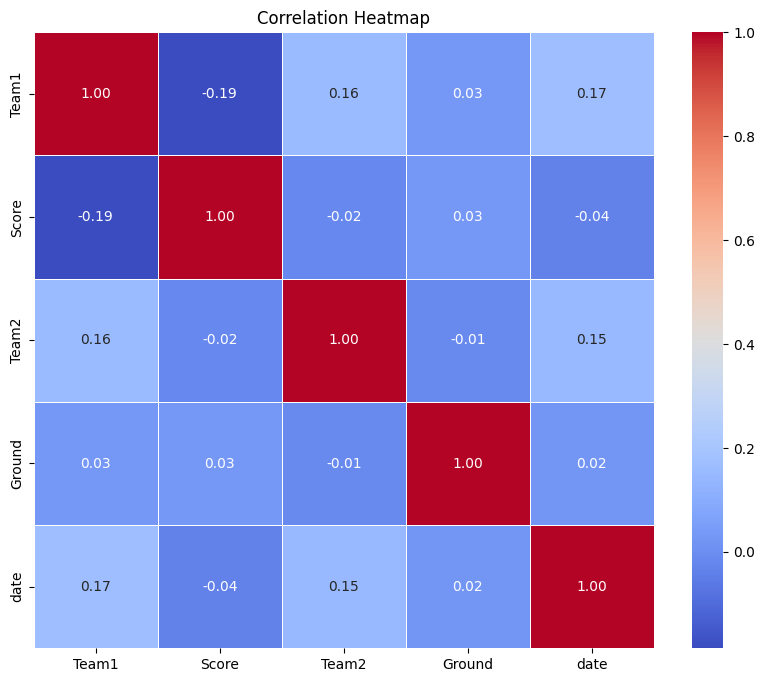

In [675]:
import seaborn as sns
correlation_matrix = df_pred1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df_pred1[['Team1'	,'Team2'	,'Ground'	,'date']]
Y = df_pred1[['Score']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
X

,Team1,Team2,Ground,date
0,15,10,33,2013.873973
1,17,6,67,2013.887671
2,6,17,114,2013.895890
3,12,14,22,2013.895890
4,17,6,62,2013.904110
...,...,...,...,...
1260,15,10,10,2023.854795
1261,0,14,3,2023.857534
1262,2,1,96,2023.860274
1263,4,12,45,2023.860274


In [ ]:
Y

,Score
0,211
1,211
2,288
3,218
4,263
...,...
1260,171
1261,244
1262,306
1263,337


In [ ]:
from tensorflow import keras

After experimenting with a number of different architechrues of the network, this following architecture was found to be most accurate(giving least mse) which has 3 hidden layers with 128 neurons each and another hidden layer with 256 neurons. In order to control overfitting, we also used regularizres with 0.02 as the regularization constant.

In [ ]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(4,)),
    keras.layers.Normalization(), #keras.layers.BatchNormalization()
    #keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),  #kernel_initializer = '' #kernel_regularizer = keras.regularizers.l2(0.01)
    keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),
    keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),  #kernel_initializer = '' #kernel_regularizer = keras.regularizers.l2(0.01)
    keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),  #kernel_initializer = '' #kernel_regularizer = keras.regularizers.l2(0.01)
    keras.layers.Dense(256, activation='relu',kernel_initializer='he_normal', kernel_regularizer = keras.regularizers.l2(0.02)),  #kernel_initializer = '' #kernel_regularizer = keras.regularizers.l2(0.01)
    keras.layers.Dense(1, activation='linear')
])

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
history = model.fit(X_scaled, Y, epochs=50, batch_size=32, validation_split=0.15)

Epoch 1/50
34/34 [==============================] - 3s 36ms/step - loss: 3669.7800 - mae: 47.3210 - val_loss: 7085.5249 - val_mae: 64.9546
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 3505.9863 - mae: 46.1322 - val_loss: 8291.0049 - val_mae: 71.2911
Epoch 3/50
34/34 [==============================] - 0s 4ms/step - loss: 3515.9121 - mae: 46.1077 - val_loss: 7034.1401 - val_mae: 65.5640
Epoch 4/50
34/34 [==============================] - 0s 4ms/step - loss: 3529.8577 - mae: 46.1741 - val_loss: 7562.2837 - val_mae: 68.5274
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: 3567.3298 - mae: 46.6099 - val_loss: 7125.8145 - val_mae: 65.2420
Epoch 6/50
34/34 [==============================] - 0s 4ms/step - loss: 3436.9202 - mae: 45.0845 - val_loss: 6749.4409 - val_mae: 64.6415
Epoch 7/50
34/34 [==============================] - 0s 4ms/step - loss: 3333.3232 - mae: 44.7653 - val_loss: 7118.3652 - val_mae: 65.9128
Epoch 8/50
34/34 [===============

Creating dummy columns for Team1 and Team2 (one hot encoding)

In [ ]:
final = pd.get_dummies(df_pred1, prefix=['Team1', 'Team2'], columns=['Team1', 'Team2'])
XR = final.drop(['Score'],axis=1)
YR = final[['Score']]

Splitting the data into training and testing parts, 90% for training and 10% for testing.

In [ ]:

split_index = int(0.9 * len(df))

X_train = XR.iloc[:split_index]
X_test = XR.iloc[split_index:]

Y_train = YR.iloc[:split_index]
Y_test = YR.iloc[split_index:]

Scaling the data using StandardScaler.

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler2 = StandardScaler()
Y_train_scaled = scaler2.fit_transform(Y_train)
Y_test_scaled = scaler2.transform(Y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


Training and testing randomforestregressor

In [ ]:
rf_model = RandomForestRegressor(max_depth=20,n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, Y_train_scaled)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test_scaled, predictions)
mae = mean_absolute_error(Y_test_scaled, predictions)

print(f'Mean Squared Error on Test Set: {mse}')
print(f'Mean Absolute Error on Test Set: {mae}')


<ipython-input-613-2a223d379ba2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_scaled, Y_train_scaled)


Mean Squared Error on Test Set: 1.4187055668773736
Mean Absolute Error on Test Set: 0.9818794676031481


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

training and testing xgb regressor

In [ ]:
dtrain = xgb.DMatrix(X_train_scaled, label=Y_train_scaled)
dtest = xgb.DMatrix(X_test_scaled, label=Y_test_scaled)

# Set the parameters for XGBoost for regression
params = {
    'objective': 'reg:squarederror',  # Specify regression
    'max_depth': 20,
    'learning_rate': 0.01,
    'eval_metric': 'rmse'  # Regression metric: Root Mean Squared Error (you can also use 'mae' for Mean Absolute Error)
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Evaluate the regression model using Mean Squared Error
mse = mean_squared_error(Y_test_scaled, y_pred)
mae = mean_absolute_error(Y_test_scaled, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {mae}")


Mean Squared Error: 1.4467930083795906
Mean Squared Error: 0.9421150954349844


Now, predicting the expected scores depending upon who bats first for the semi final games.

In [ ]:
df_pred1

,Team1,Score,Team2,Ground,date
0,15,211,10,33,2013.873973
1,17,211,6,67,2013.887671
2,6,288,17,114,2013.895890
3,12,218,14,22,2013.895890
4,17,263,6,62,2013.904110
...,...,...,...,...,...
1260,15,171,10,10,2023.854795
1261,0,244,14,3,2023.857534
1262,2,306,1,96,2023.860274
1263,4,337,12,45,2023.860274


creating new dataframes for each of the prediction we want to make which is in the same format as of what we have trained on.

In [ ]:
new1 = {'Team1': 'India', 'Team2': 'New Zealand', 'Date' : 'Nov 15, 2023', 'Ground' : 'Wankhede'}
dfnew1 = pd.DataFrame(new1,[2000])
dfnew1['date'] = pd.to_datetime(dfnew1['Date'])
dfnew1['date'] = dt64_to_float(dfnew1['date'].to_numpy())
dfnew1 = dfnew1.drop(['Date'],axis=1)

In [ ]:
new2 = {'Team1': 'South Africa', 'Team2': 'Australia', 'Date' : 'Nov 16, 2023', 'Ground' : 'Eden Gardens'}
dfnew2 = pd.DataFrame( new2,[2001])
dfnew2['date'] = pd.to_datetime(dfnew2['Date'])
dfnew2['date'] = dt64_to_float(dfnew2['date'].to_numpy())
dfnew2 = dfnew2.drop(['Date'],axis=1)

In [ ]:
new3 = {'Team2': 'India', 'Team1': 'New Zealand', 'Date' : 'Nov 15, 2023', 'Ground' : 'Wankhede'}
dfnew3 = pd.DataFrame(new3,[2002])
dfnew3['date'] = pd.to_datetime(dfnew3['Date'])
dfnew3['date'] = dt64_to_float(dfnew3['date'].to_numpy())
dfnew3 = dfnew3.drop(['Date'],axis=1)

In [ ]:
new4 = {'Team2': 'South Africa', 'Team1': 'Australia', 'Date' : 'Nov 16, 2023', 'Ground' : 'Eden Gardens'}
dfnew4 = pd.DataFrame( new4,[2003])
dfnew4['date'] = pd.to_datetime(dfnew4['Date'])
dfnew4['date'] = dt64_to_float(dfnew4['date'].to_numpy())
dfnew4 = dfnew4.drop(['Date'],axis=1)

In [ ]:
dfSemi = pd.concat([dfnew1,dfnew2,dfnew3,dfnew4])

Now, transforming dfSemi in the similar fashion as we transformed input data

In [ ]:
dfSemi

,Team1,Team2,Ground,date
2000,India,New Zealand,Wankhede,2023.871233
2001,South Africa,Australia,Eden Gardens,2023.873973
2002,New Zealand,India,Wankhede,2023.871233
2003,Australia,South Africa,Eden Gardens,2023.873973


In [ ]:
dfSemi['Ground']=label_encoder1.transform(dfSemi['Ground'])

In [ ]:
dfSemitemp = dfSemi[['Team1','Team2']]

In [ ]:
dfSemitemp = dfSemitemp.apply(lambda col: col.map(country_mapping))

In [ ]:
dfSemi[['Team1']] = dfSemitemp[['Team1']]
dfSemi[['Team2']] = dfSemitemp[['Team2']]

In [ ]:
dfSemi

,Team1,Team2,Ground,date
2000,6,10,115,2023.871233
2001,14,1,45,2023.873973
2002,10,6,115,2023.871233
2003,1,14,45,2023.873973


In [ ]:
dfnew=dfSemi

Concatenating the new data with initial training data to get the dummy columns properly.

In [ ]:
dfFull = pd.concat([df_pred1,dfnew])
dfFull

,Team1,Score,Team2,Ground,date
0,15,211.0,10,33,2013.873973
1,17,211.0,6,67,2013.887671
2,6,288.0,17,114,2013.895890
3,12,218.0,14,22,2013.895890
4,17,263.0,6,62,2013.904110
...,...,...,...,...,...
1260,15,171.0,10,10,2023.854795
2000,6,NaN,10,115,2023.871233
2001,14,NaN,1,45,2023.873973
2002,10,NaN,6,115,2023.871233


In [ ]:
Xnew = dfFull.drop(['Score'],axis=1)
Ynew = dfFull[['Score']]

In [ ]:
Xnew

,Team1,Team2,Ground,date
0,15,10,33,2013.873973
1,17,6,67,2013.887671
2,6,17,114,2013.895890
3,12,14,22,2013.895890
4,17,6,62,2013.904110
...,...,...,...,...
1260,15,10,10,2023.854795
2000,6,10,115,2023.871233
2001,14,1,45,2023.873973
2002,10,6,115,2023.871233


In [ ]:
Ynew = Ynew.drop(index=2000)
Ynew = Ynew.drop(index=2001)
Ynew = Ynew.drop(index=2002)
Ynew = Ynew.drop(index=2003)
Ynew

,Score
0,211.0
1,211.0
2,288.0
3,218.0
4,263.0
...,...
1256,326.0
1257,279.0
1258,291.0
1259,339.0


Creating dummy columns for the team1 and team2

In [ ]:
Xnew_with_dummies = pd.get_dummies(Xnew, prefix=['Team1', 'Team2'], columns=['Team1', 'Team2'])
Xnew_with_dummies

,Ground,date,Team1_0,Team1_1,Team1_2,Team1_3,Team1_4,Team1_5,Team1_6,Team1_7,Team1_8,Team1_9,Team1_10,Team1_12,Team1_13,Team1_14,Team1_15,Team1_16,Team1_17,Team1_18,Team1_19,Team1_20,Team1_21,Team1_22,Team1_23,Team1_24,Team2_0,Team2_1,Team2_2,Team2_3,Team2_4,Team2_5,Team2_6,Team2_7,Team2_8,Team2_9,Team2_10,Team2_12,Team2_13,Team2_14,Team2_15,Team2_16,Team2_17,Team2_18,Team2_19,Team2_20,Team2_21,Team2_22,Team2_23,Team2_24
0,33,2013.873973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,67,2013.887671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,114,2013.895890,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,22,2013.895890,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,62,2013.904110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,10,2023.854795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2000,115,2023.871233,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2001,45,2023.873973,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002,115,2023.871233,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Keeping last 4 rows for prediction while all the other instances are for training.

In [ ]:
train_indices, test_indices = train_test_split(range(len(Xnew_with_dummies)), test_size=4, shuffle=False)

X_train, X_test = Xnew_with_dummies.iloc[train_indices], Xnew_with_dummies.iloc[test_indices]

In [ ]:
scaler8 = StandardScaler()
X_train_scaled = scaler8.fit_transform(X_train)
X_test_scaled = scaler8.transform(X_test)

In [ ]:
scaler9 = StandardScaler()
Ynew_scaled = scaler9.fit_transform(Ynew)

Training the random forest on the entire dataset.

Retraining the model again on the entire dataset for better predictions.

In [ ]:
rf_model = RandomForestRegressor(max_depth=20,n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, Ynew_scaled)



<ipython-input-649-980b5776480c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_scaled, Ynew_scaled)


RandomForestRegressor(max_depth=20, random_state=42)

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
y_pred = rf_model.predict(X_test_scaled)

In [ ]:
y_pred

array([0.73071235, 1.5491047 , 0.38130648, 1.23757443])

In [ ]:
scaler9.inverse_transform(y_pred.reshape(4,-1))

array([[305.26846154],
       [363.076     ],
       [280.58800974],
       [341.07090909]])

#Prediction Summary :

##SEMI-FINAL 1 : INDIA vs NEW ZEALAND
If INDIA bats first : target = 320

if NEW ZEALAND bats first : target = 292

##SEMI-FINAL 1 : SOUTH AFRICA vs AUSTRALIA
If SOUTH AFRICA bats first : target = 359

if AUSTRALIA bats first : target = 338